In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Watches_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Software_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_PC_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Music_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Video_DVD_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Beauty_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Mobile_Electronics_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Shoes_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Apparel_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Tools_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Digital_Video_Games_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/am

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
Accuracy: 0.9740295525781008
Precision: 0.9782939159331141
Recall: 0.9949663826268291
F1-score: 0.9865597147950089


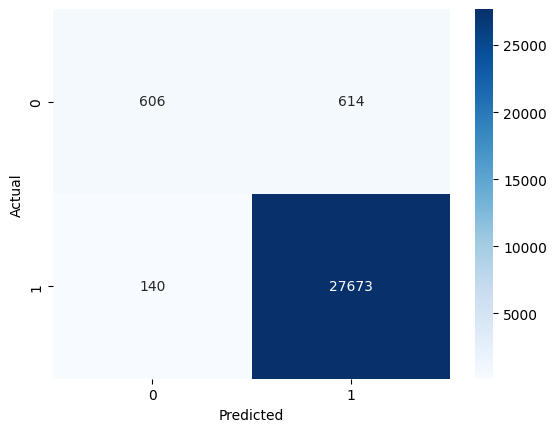

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Gift_Card_v1_00.tsv', sep='\t')

# Select only relevant columns
df = df[['review_body', 'star_rating']]

# Download stopwords
nltk.download('stopwords')

# Define the text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the review text
df['cleaned_review'] = df['review_body'].apply(lambda x: clean_text(str(x)))

# Label encoding: 1-2 stars → 0 (Negative), 4-5 stars → 1 (Positive), ignore 3-star reviews
df = df[df['star_rating'] != 3]
df['label'] = df['star_rating'].apply(lambda x: 1 if x > 3 else 0)

# Define features and target variable
X = df['cleaned_review']
y = df['label']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vect, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_vect)

# Evaluate the model’s performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [3]:
df.head(n = 50)

,review_body,star_rating,cleaned_review,label
0,Great birthday gift for a young adult.,5,great birthday gift young adult,1
1,It's an Amazon gift card and with over 9823983...,5,amazon gift card items sure find something love,1
2,Good,5,good,1
3,Fair,1,fair,0
4,I can't believe how quickly Amazon can get the...,5,cant believe quickly amazon get hands thank,1
5,Perfect! Nice & easy plus everyone loves them...,5,perfect nice easy plus everyone loves one gift...,1
6,excelent,5,excelent,1
7,Great and Safe Gift Giving,5,great safe gift giving,1
8,What?????????,1,,0
9,This was just too easy~click & print!,5,easyclick print,1
